In [13]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import scipy.io
import os
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import random

### Преобразование данных в нужный вид

In [2]:
label_names = os.listdir('PRW-v16.04.20/annotations/')
data = []
for name in label_names:
    name = name[:-4]
    label = scipy.io.loadmat('PRW-v16.04.20/annotations/' + name)
    image = Image.open('PRW-v16.04.20/frames/' + name)
    data += [(image.copy(), label[list(label.keys())[3]], name)]
    image.close()

[[  -2.          193.98137153  480.39800763   49.3669103   149.42472994]
 [   3.         1024.64686825  414.53887689   48.98488121  158.61771058]]


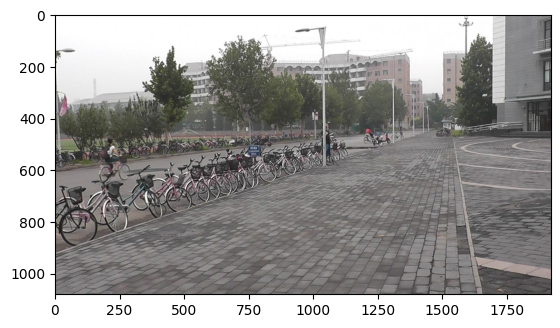

In [3]:
idx = 0
plt.imshow(data[idx][0])
print(data[idx][1])

In [4]:
random.shuffle(data)

[[ 183.          371.51511879  349.22570194   83.97408207  186.60907127]
 [ 184.          271.21274298  342.22786177   60.64794816  177.27861771]
 [ 225.         1033.97732181  337.56263499   86.30669546  214.60043197]
 [ 231.          824.30374785  359.24343719   38.48552759  119.1997181 ]
 [ 237.          147.89130435  513.10869565  247.82608696  560.86956522]]


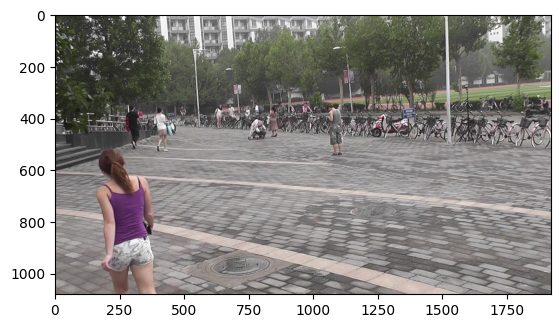

In [5]:
plt.imshow(data[idx][0])
print(data[idx][1])

In [6]:
size = len(data)
size

11816

In [7]:
train_size = int(size * 0.8 * 0.8)
val_size = int(size * 0.8) - train_size
test_size = size - train_size - val_size

In [8]:
print(train_size, val_size, test_size)

7562 1890 2364


In [9]:
def make_label(label, img_size):
    return [(label[0] + (label[2] / 2)) / img_size[0], (label[1] + (label[3] / 2)) / img_size[1], label[2] / img_size[0], label[3] / img_size[1]]

In [10]:
def create_files(path, data, type):
    image = data[0].save(f"{path}/{type}/images/{data[2]}", 'JPEG')
    label = open(f"{path}/{type}/labels/{data[2][:-4]}.txt", 'w')
    for info in data[1]:
        label.write('0 ')
        info = make_label(info[1:], data[0].size)
        for inf in info:
            label.write(str(inf) + ' ')
        label.write('\n')
    label.close()

In [11]:
for i in range(size):
    path = os.path.abspath('PRW_dataset/')
    if i < train_size:
        create_files(path, data[i], 'train')
    else:
        if i < train_size + val_size:
            create_files(path, data[i], 'val')
        else:
            create_files(path, data[i], 'test')

### Обучение YOLOv5 модели

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO('yolov5/yolov5m.pt')

PRO TIP  Replace 'model=yolov5/yolov5m.pt' with new 'model=yolov5/yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [3]:
model.train(data='PRW_dataset/data.yaml', epochs=5, device=0)

Ultralytics YOLOv8.1.43  Python-3.11.2 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
engine\trainer: task=detect, mode=train, model=yolov5/yolov5m.pt, data=PRW_dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

c:\Users\elise\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AMP: checks passed 


train: Scanning D:\task05.04.24\PRW_dataset\train\labels... 7562 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7562/7562 [01:24<00:00, 89.81it/s] 

train: WARNING  D:\task05.04.24\PRW_dataset\train\images\c6s1_000476.jpg: 1 duplicate labels removed


train: New cache created: D:\task05.04.24\PRW_dataset\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\task05.04.24\PRW_dataset\val\labels... 1890 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1890/1890 [00:19<00:00, 94.86it/s] 


val: New cache created: D:\task05.04.24\PRW_dataset\val\labels.cache
Plotting labels to runs\detect\train39\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train39
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      6.73G      1.239     0.7961      1.029         45        640: 100%|██████████| 473/473 [01:44<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:09<00:00,  6.36it/s]

                   all       1890       6881      0.835      0.803      0.881      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      6.92G      1.253     0.7487      1.035         51        640: 100%|██████████| 473/473 [01:42<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:08<00:00,  6.69it/s]

                   all       1890       6881      0.874      0.886      0.934      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      6.93G      1.216     0.7046      1.023         70        640: 100%|██████████| 473/473 [01:42<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:09<00:00,  6.49it/s]

                   all       1890       6881      0.859      0.873      0.929      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      6.92G      1.158     0.6474     0.9968         53        640: 100%|██████████| 473/473 [01:38<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:09<00:00,  6.51it/s]

                   all       1890       6881      0.895      0.899      0.954       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      6.93G      1.102     0.5912     0.9763         71        640: 100%|██████████| 473/473 [01:39<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:09<00:00,  6.66it/s]

                   all       1890       6881      0.898      0.916      0.961      0.683



5 epochs completed in 0.159 hours.
Optimizer stripped from runs\detect\train39\weights\last.pt, 50.5MB
Optimizer stripped from runs\detect\train39\weights\best.pt, 50.5MB

Validating runs\detect\train39\weights\best.pt...
Ultralytics YOLOv8.1.43  Python-3.11.2 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
YOLOv5m summary (fused): 248 layers, 25045795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:10<00:00,  5.58it/s]


                   all       1890       6881      0.898      0.916      0.961      0.683
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train39


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BE2FF7FD50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Картинки из test

In [17]:
test_images = ['PRW_dataset/test/images/c6s2_117218.jpg', 'PRW_dataset/test/images/c1s1_000376.jpg', 'PRW_dataset/test/images/c1s3_025826.jpg', 'PRW_dataset/test/images/c1s3_061901.jpg', 'PRW_dataset/test/images/c1s4_006231.jpg', 'PRW_dataset/test/images/c2s1_106821.jpg', 'PRW_dataset/test/images/c2s1_132366.jpg', 'PRW_dataset/test/images/c3s1_070342.jpg', 'PRW_dataset/test/images/c3s1_082467.jpg', 'PRW_dataset/test/images/c3s2_101978.jpg', 'PRW_dataset/test/images/c3s2_110903.jpg', 'PRW_dataset/test/images/c4s4_066916.jpg', 'PRW_dataset/test/images/c5s1_005576.jpg', 'PRW_dataset/test/images/c5s2_105927.jpg', 'PRW_dataset/test/images/c5s2_118724.jpg', 'PRW_dataset/test/images/c6s2_006818.jpg', 'PRW_dataset/test/images/c6s2_009493.jpg', 'PRW_dataset/test/images/c6s2_011593.jpg']

In [18]:
result = model.predict(test_images, conf=0.5, save=True)


0: 640x640 7 persons, 5.5ms
1: 640x640 3 persons, 5.5ms
2: 640x640 6 persons, 5.5ms
3: 640x640 1 person, 5.5ms
4: 640x640 4 persons, 5.5ms
5: 640x640 4 persons, 5.5ms
6: 640x640 6 persons, 5.5ms
7: 640x640 3 persons, 5.5ms
8: 640x640 4 persons, 5.5ms
9: 640x640 3 persons, 5.5ms
10: 640x640 6 persons, 5.5ms
11: 640x640 2 persons, 5.5ms
12: 640x640 2 persons, 5.5ms
13: 640x640 3 persons, 5.5ms
14: 640x640 2 persons, 5.5ms
15: 640x640 5 persons, 5.5ms
16: 640x640 1 person, 5.5ms
17: 640x640 2 persons, 5.5ms
Speed: 1.9ms preprocess, 5.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\train395


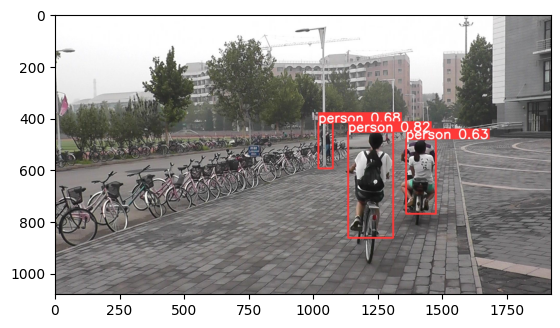

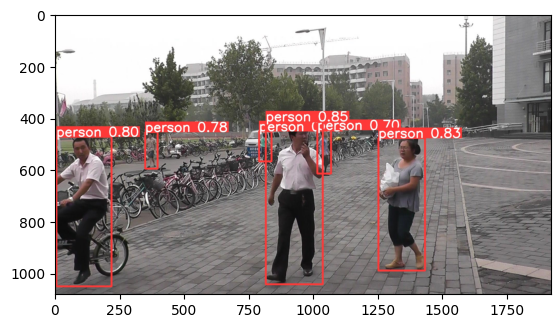

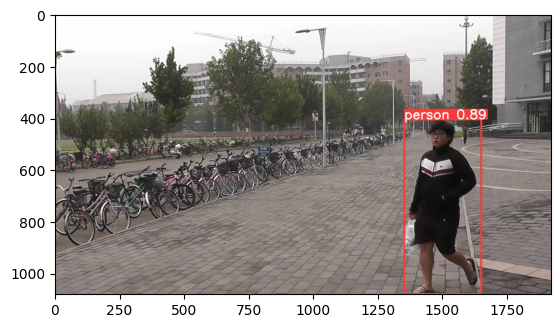

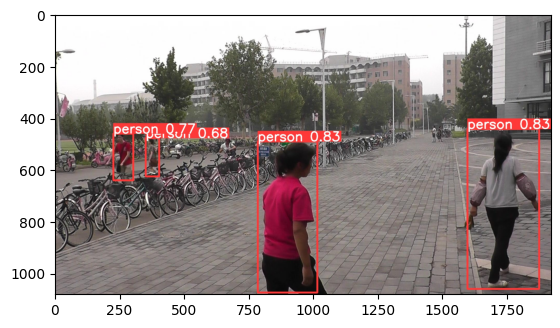

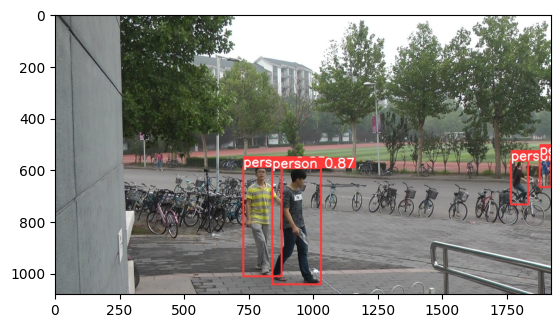

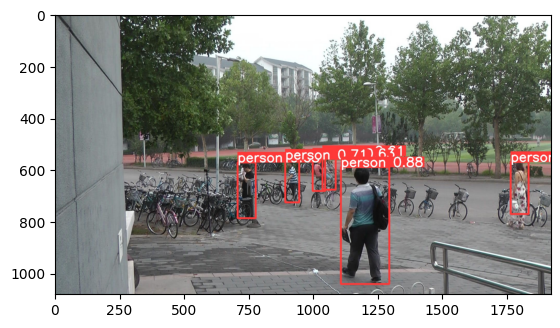

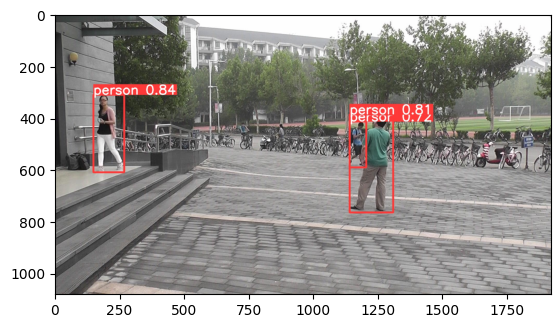

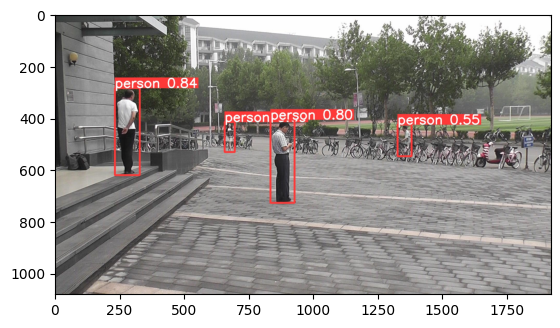

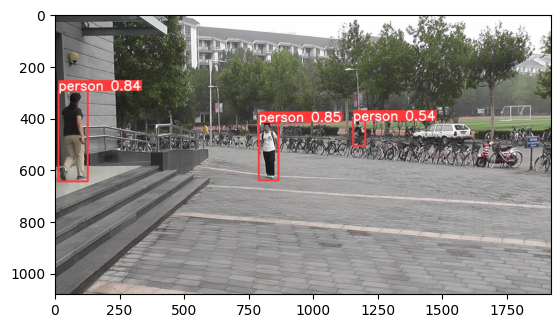

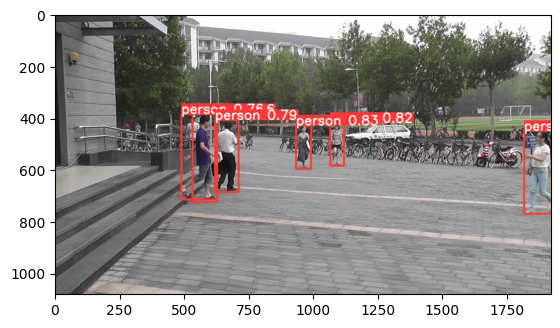

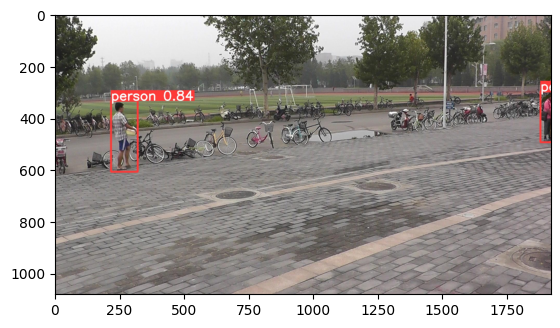

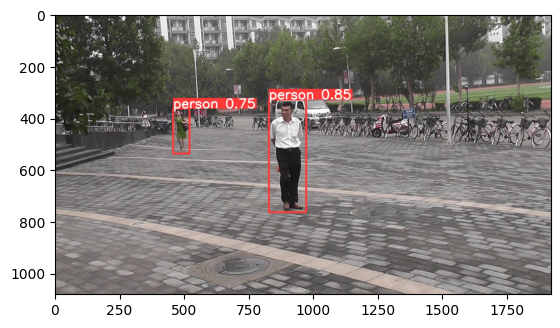

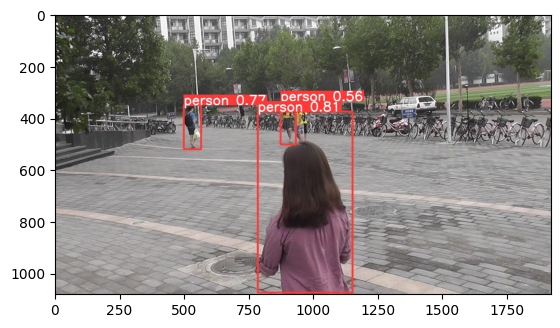

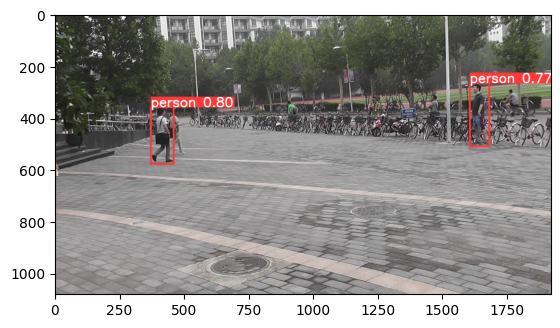

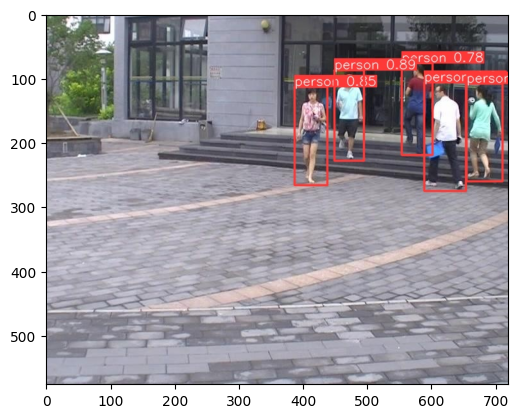

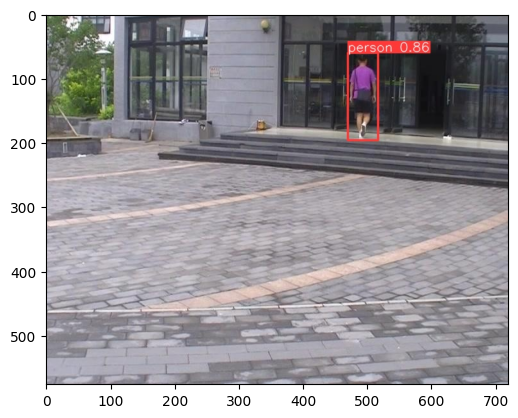

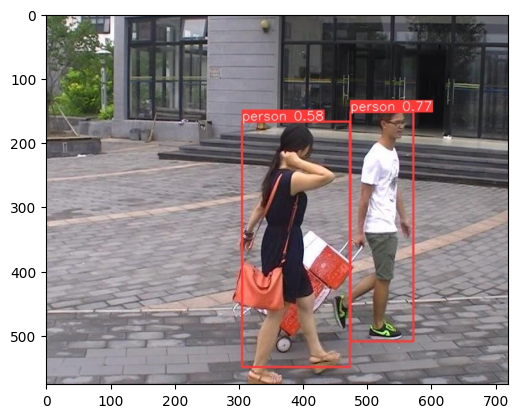

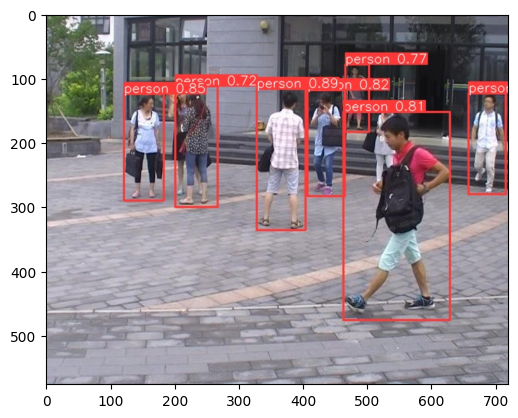

In [20]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import os
path = 'runs/detect/train395/'
images = os.listdir(path)

for image in images:
    im = Image.open(path + image)
    plt.imshow(im)
    plt.show()

### Картинка из Интернета

In [14]:
test_images = ['a100f829-afeb-4db8-b153-5c9147ac287e.jpeg']

In [15]:
result = model.predict(test_images, conf=0.5, save=True)


0: 480x640 12 persons, 115.0ms
Speed: 2.0ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\train394


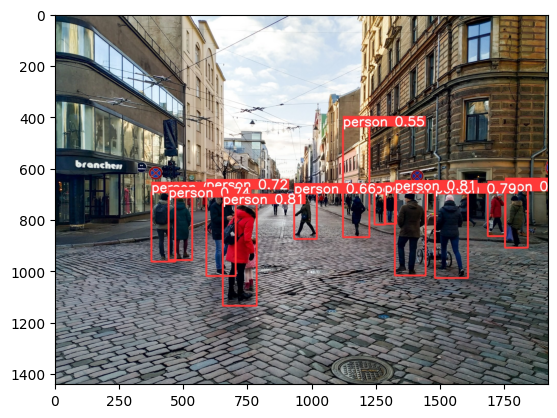

In [16]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import os
path = 'runs/detect/train394/'
images = os.listdir(path)

for image in images:
    im = Image.open(path + image)
    plt.imshow(im)
    plt.show()